# Import библиотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

# Набор данных

In [15]:
df = fetch_openml("mnist_784", version=1)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


# Обучение

## Обработка переменных

In [22]:
X, y = df["data"], df["target"]
print(f"Размер данных: {X.shape}")

Размер данных: (70000, 784)


In [23]:
# разделяем на тестовую и тренировочную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                test_size=0.2,
                                                random_state=42)

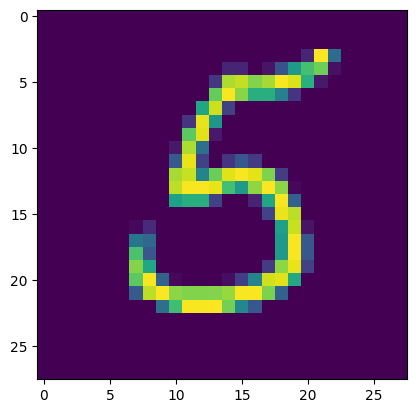

In [24]:
# как выглядят данные (на одном примере)
image = np.array(X_train.iloc[0]).reshape(28, 28)
plt.imshow(image)

## Модель

In [25]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier()
model.fit(X_train, y_train)

SGDClassifier()

## Предсказания

In [26]:
# посмотрим, что мы предсказываем
predictions = model.predict(X_test)
predictions

array(['8', '4', '5', ..., '2', '7', '1'], dtype='<U1')

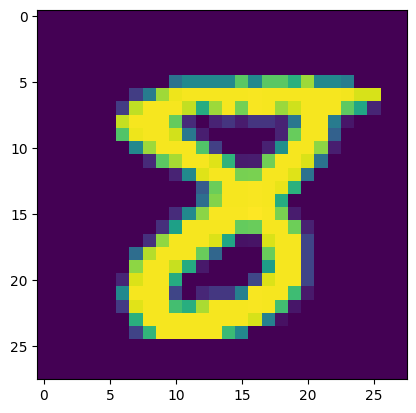

In [27]:
#отдельно посмотрим, как выглядит 1-ый элемент в тесте и он соответствует нашим предсказаниям
image = np.array(X_test.iloc[0]).reshape(28, 28)
plt.imshow(image)

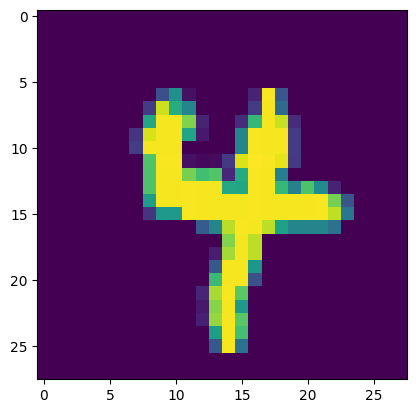

In [28]:
#отдельно посмотрим, как выглядит 2-ый элемент в тесте и он соответствует нашим предсказаниям
image = np.array(X_test.iloc[1]).reshape(28, 28)
plt.imshow(image)

## Метрики модели

In [37]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [33]:
y_pred = model.predict(X_test)

In [36]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")

Accuracy: 0.8933571428571428
Precision: 0.8931065475848727
Recall: 0.8917264170410439
F1: 0.8916033991462857


Впринципе метрики довольно хорошие, посмотрим их внутри классов

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1343
           1       0.92      0.97      0.95      1600
           2       0.83      0.92      0.87      1380
           3       0.92      0.85      0.88      1433
           4       0.88      0.92      0.90      1295
           5       0.85      0.82      0.83      1273
           6       0.94      0.94      0.94      1396
           7       0.94      0.89      0.92      1503
           8       0.84      0.77      0.80      1357
           9       0.85      0.88      0.86      1420

    accuracy                           0.89     14000
   macro avg       0.89      0.89      0.89     14000
weighted avg       0.89      0.89      0.89     14000



Впринципе метрики внутри классов также достаточно хороши, однако есть провалы по метрикам у 8, что может быть вызвано тем, что мы ее с чем-то путаем (по балансу классов впринципе есть баланс)

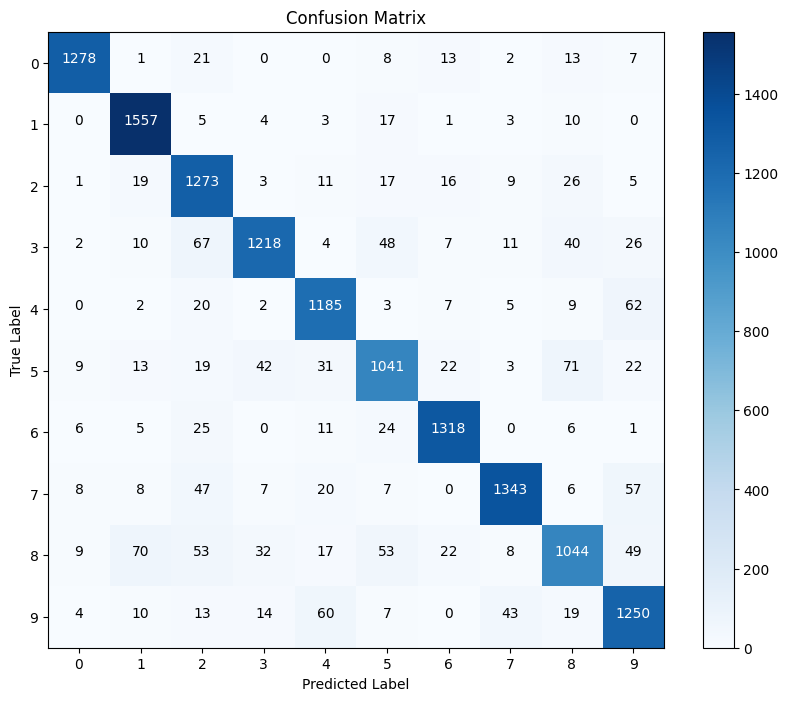

In [40]:
cm = confusion_matrix(y_test, y_pred)

# Постройте матрицу ошибок в виде тепловой карты
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test))
plt.yticks(tick_marks, np.unique(y_test))

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

for i in range(len(np.unique(y_test))):
    for j in range(len(np.unique(y_test))):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment='center', color='white' if cm[i, j] > cm.max() / 2 else 'black')

plt.show()

Гипотеза о классе с 8, выдвинутая сверху, оказалась правдой, мы часто предсказываем 8 у чисел 5 и 3 (вроде есть что-то похожее). Однако это не самый проблемный класс, мы очень много путаем 5 с другими цифрами. Хорошо мы справляемся с 1 и 7